Imports and file paths

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# Set file paths to downloaded data

dlw_path = '/Volumes/SanDisk/ECCOEXFOR/EXFlwdn_2017_05.nc'
tdsw_path = '/Volumes/SanDisk/ECCOEXFOR/EXFswdn_2017_05.nc'
rain_path = '/Volumes/SanDisk/ECCOEXFOR/EXFpreci_2017_05.nc'
spfh_path = '/Volumes/SanDisk/ECCOEXFOR/EXFaqh_2017_05.nc'
ustr_path = '/Volumes/SanDisk/ECCOEXFOR/EXFuwind_2017_05.nc'
vstr_path = '/Volumes/SanDisk/ECCOEXFOR/EXFvwind_2017_05.nc'


In [2]:
import xarray as xr

# Load the bathymetry data from NetCDF file
bathymetry_data = xr.open_dataset("ModelBathymetry.nc")
Model_bathy = bathymetry_data["Bathymetry"]

print(Model_bathy)  # Verify the data is loaded correctly



<xarray.DataArray 'Bathymetry' (lat: 253, lon: 101)>
[25553 values with dtype=float64]
Dimensions without coordinates: lat, lon


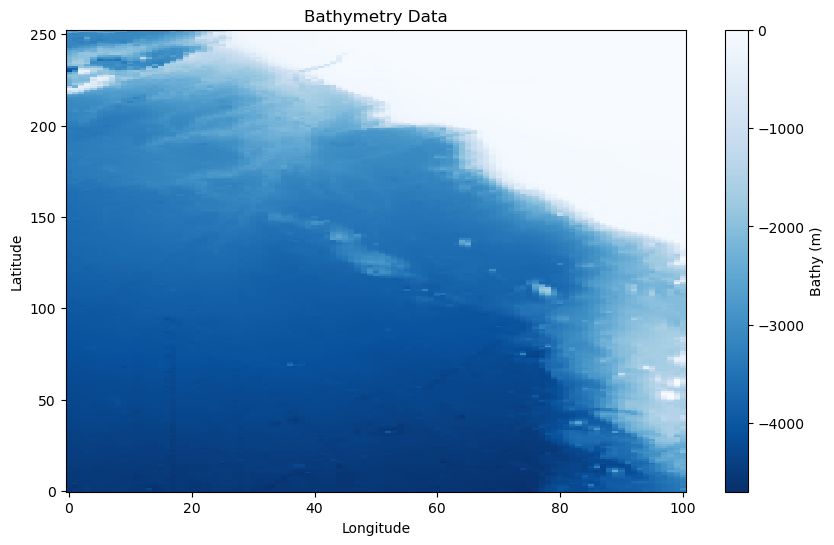

In [3]:
import matplotlib.pyplot as plt

# Plot the bathymetry data
plt.figure(figsize=(10, 6))
mappable = Model_bathy.plot(cmap="Blues_r", add_colorbar=False)  # Disable automatic colorbar since I get an mappable error   
plt.title("Bathymetry Data")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(mappable=mappable, label="Bathy (m)")
plt.show()



In [4]:
import xarray as xr

# Load the model grid data
model_grid_data = xr.open_dataset("ModelGrid.nc")

# Extract longitude and latitude
model_lon = model_grid_data["lon"]
model_lat = model_grid_data["lat"]

# Verify
print(model_lon)
print(model_lat)


<xarray.DataArray 'lon' (y: 253, x: 101)>
[25553 values with dtype=float64]
Dimensions without coordinates: y, x
<xarray.DataArray 'lat' (y: 253, x: 101)>
[25553 values with dtype=float64]
Dimensions without coordinates: y, x


In [5]:
# Interpolate bathymetry to match model grid
interpolated_bathy = Model_bathy.interp(
    lon=model_lon, 
    lat=model_lat
)

# Verify the interpolated bathymetry
print(interpolated_bathy)


<xarray.DataArray 'Bathymetry' (y: 253, x: 101)>
array([[-4585.19348958, -4585.43046875, -4585.66744792, ...,
        -4607.61635417, -4607.55489583, -4607.4934375 ],
       [-4584.93046875, -4585.14140625, -4585.35234375, ...,
        -4607.34239583, -4607.29135417, -4607.2403125 ],
       [-4584.66744792, -4584.85234375, -4585.03723958, ...,
        -4607.0684375 , -4607.0278125 , -4606.9871875 ],
       ...,
       [-4482.88807292, -4483.62921875, -4484.37036458, ...,
        -4534.10057292, -4534.58130208, -4535.06203125],
       [-4483.12296875, -4483.98390625, -4484.84484375, ...,
        -4533.62713542, -4534.12348958, -4534.61984375],
       [-4483.35786458, -4484.33859375, -4485.31932292, ...,
        -4533.15369792, -4533.66567708, -4534.17765625]])
Coordinates:
    lon      (y, x) float64 63.64 63.73 63.81 63.89 ... 71.73 71.81 71.89 71.98
    lat      (y, x) float64 8.631 8.631 8.631 8.631 ... 24.38 24.38 24.38 24.38
Dimensions without coordinates: y, x


In [6]:
# Load the datasets for 2017 
import xarray as xr
ustr_data = xr.open_dataset(ustr_path, engine="netcdf4")
vstr_data = xr.open_dataset(vstr_path, engine="netcdf4")
dlw_data = xr.open_dataset(dlw_path, engine="netcdf4")
tdsw_data = xr.open_dataset(tdsw_path, engine="netcdf4")
spfh_data = xr.open_dataset(spfh_path, engine="netcdf4")
rain_data = xr.open_dataset(rain_path, engine="netcdf4")


import os
print(os.path.exists(ustr_path))  # This should return True if the file exists at the specified path

# Display information for each dataset
print("Zonal Wind Stress Data (2017):", ustr_data)
#print("Meridional Wind Stress Data (2017):", vstr_data)
#print("Downward Longwave Radiation Data (2017):", dlw_data)
#print("Downward Shortwave Radiation Data (2017):", tdsw_data)
#print("Specific Humidity Data (2017):", spfh_data)
#print("Rain Data (2017):", rain_data)  # Preview 2017 rain data



True
Zonal Wind Stress Data (2017): <xarray.Dataset>
Dimensions:    (j: 90, i: 90, tile: 13, time: 1, nv: 2)
Coordinates:
  * j          (j) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i          (i) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * tile       (tile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    XC         (tile, j, i) float32 ...
    YC         (tile, j, i) float32 ...
    timestep   (time) int64 ...
  * time       (time) datetime64[ns] 2017-05-16T12:00:00
    time_bnds  (time, nv) datetime64[ns] ...
Dimensions without coordinates: nv
Data variables:
    EXFuwind   (time, tile, j, i) float32 ...
Attributes: (12/26)
    product_time_coverage_start:  1992-01-01T12:00:00
    author:                       Ou Wang and Ian Fenty
    Insitution:                   JPL
    product_version:              ECCO Version 4 Release 3 Extension (ECCOv4r...
    time_units:                   days since 1992-01-01 00:00:00
    Conventions:                  CF-1

In [9]:

# Define spatial region and time slice based on dimensions i and j
# Define spatial region and time slice based on dimensions i and j
time = "2017-05"
i_slice = slice(0, 90)  # Use full longitude range
j_slice = slice(0, 90)  # Use full latitude range

# Select region and time for each forcing variable
uwind_selected = ustr_data.sel(time=time, i=i_slice, j=j_slice)
vwind_selected = vstr_data.sel(time=time, i=i_slice, j=j_slice)
lwdn_selected = dlw_data.sel(time=time, i=i_slice, j=j_slice)
swdn_selected = tdsw_data.sel(time=time, i=i_slice, j=j_slice)
aqh_selected = spfh_data.sel(time=time, i=i_slice, j=j_slice)
preci_selected = rain_data.sel(time=time, i=i_slice, j=j_slice)





In [10]:


# Extract the specific variable from the dataset
uwind_selected = uwind_selected["EXFuwind"]
vwind_selected = vwind_selected["EXFvwind"]
swdn_selected = swdn_selected["EXFswdn"]
lwdn_selected = lwdn_selected["EXFlwdn"]
aqh_selected = aqh_selected["EXFaqh"]
preci_selected = preci_selected["EXFpreci"]

# Verify the shape after extraction
print("uwind_selected shape:", uwind_selected.shape)




uwind_selected shape: (1, 13, 90, 90)


In [12]:
print("Bathymetry longitude shape:", Model_bathy.lon.values.shape)
print("Bathymetry latitude shape:", Model_bathy.lat.values.shape)
print("Bathymetry values shape:", Model_bathy.values.shape)


Bathymetry longitude shape: (101,)
Bathymetry latitude shape: (253,)
Bathymetry values shape: (253, 101)


In [13]:
print("Bathymetry longitude (flattened):", Model_bathy.lon.values.ravel().shape)
print("Bathymetry latitude (flattened):", Model_bathy.lat.values.ravel().shape)
print("Bathymetry data (flattened):", Model_bathy.values.ravel().shape)


Bathymetry longitude (flattened): (101,)
Bathymetry latitude (flattened): (253,)
Bathymetry data (flattened): (25553,)


In [19]:
# Define the parameters 
delX = 1/12  # Longitude spacing
delY = 1/16  # Latitude spacing
xgOrigin = 63.6  # New starting longitude (expanded further west)
ygOrigin = 8.6   # Starting latitude remains the same

# Define the new boundaries
longitude_max = 72.0  # Eastern boundary remains the same
latitude_max = 24.4   # Expanded further north

# Calculate the number of columns and rows for the expanded area
n_cols = int((longitude_max - xgOrigin) / delX)
n_rows = int((latitude_max - ygOrigin) / delY)

# Generate the expanded grid
xc = np.arange(xgOrigin + delX / 2, xgOrigin + n_cols * delX + delX / 2, delX)
yc = np.arange(ygOrigin + delY / 2, ygOrigin + n_rows * delY + delY / 2, delY)
XC, YC = np.meshgrid(xc, yc)

print('Double check shape:', np.shape(xc),np.shape(yc))

Double check shape: (101,) (253,)


In [20]:
from scipy.interpolate import griddata
lon_2d, lat_2d = np.meshgrid(Model_bathy.lon.values, Model_bathy.lat.values)
bathy_points = np.array([lon_2d.ravel(), lat_2d.ravel()]).T
interpolated_bathy = griddata(
    bathy_points, Model_bathy.values.ravel(), (XC, YC), method='linear'
)


In [21]:
# Check min and max values without using .values
print("Min bathymetry value:", interpolated_bathy.min())
print("Max bathymetry value:", interpolated_bathy.max())

# Print the interpolated bathymetry array to see the data
print(interpolated_bathy)


Min bathymetry value: -4677.506250000017
Max bathymetry value: -4428.64374999999
[[-4584.0625     -4584.5625     -4585.0625     ... -4607.85833333
  -4607.69166667 -4607.525     ]
 [-4583.94791667 -4584.1875     -4584.6875     ... -4607.60833333
  -4607.44166667 -4607.275     ]
 [-4583.88541667 -4583.96875    -4584.3125     ... -4607.35833333
  -4607.19166667 -4607.025     ]
 ...
 [-4479.10625    -4479.35625    -4481.09166667 ... -4534.24791667
  -4534.66458333 -4535.08125   ]
 [-4478.41875    -4479.675      -4481.84166667 ... -4533.81041667
  -4534.22708333 -4534.64375   ]
 [-4478.25833333 -4480.425      -4482.59166667 ... -4533.37291667
  -4533.78958333 -4534.20625   ]]


Grid shapes: (253, 101), (253, 101)
Interpolated bathymetry shape: (253, 101)


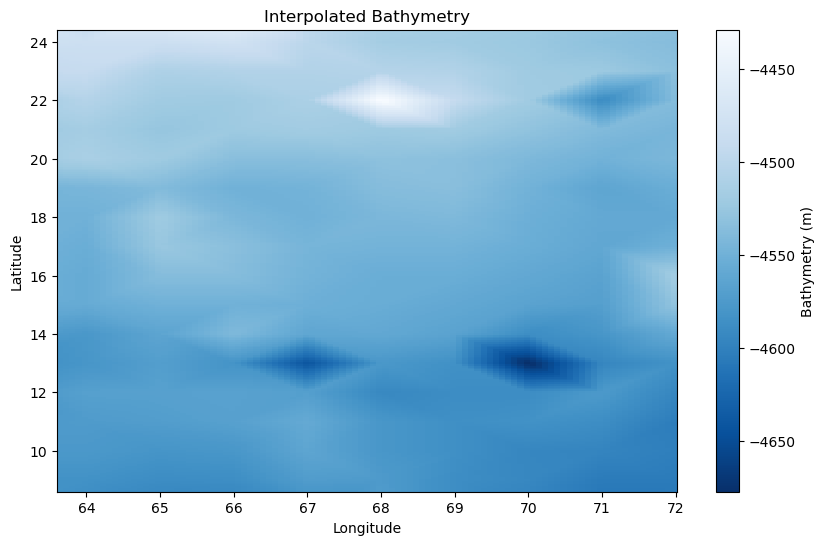

In [22]:
# Validate the model grid shapes
print(f"Grid shapes: {XC.shape}, {YC.shape}")

# Validate the interpolated bathymetry
print("Interpolated bathymetry shape:", interpolated_bathy.shape)

# Plotting the interpolated bathymetry to visually confirm
plt.figure(figsize=(10, 6))
plt.pcolormesh(XC, YC, interpolated_bathy, cmap="Blues_r", shading="auto")
plt.colorbar(label="Bathymetry (m)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Interpolated Bathymetry")
plt.show()


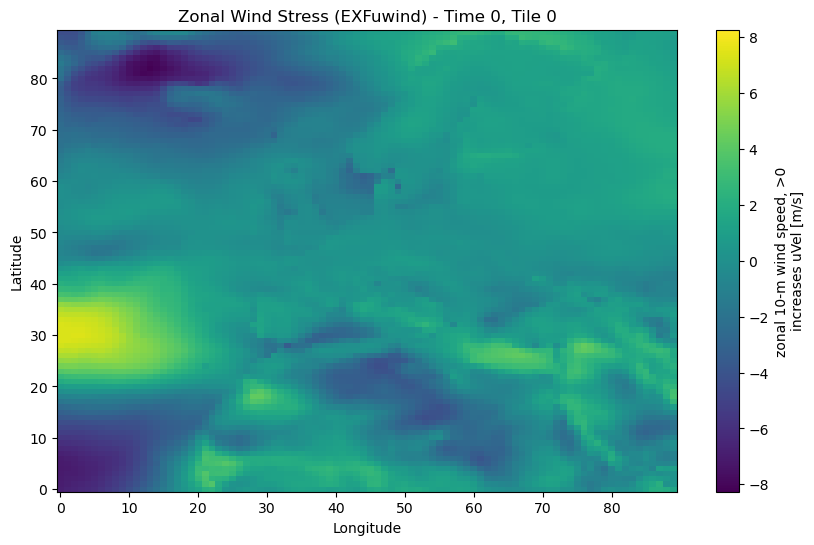

In [31]:
# Select the specific time and tile
wind_selected = uwind_selected.isel(time=0, tile=2)

# Plot the selected data
plt.figure(figsize=(10, 6))
wind_selected.plot.pcolormesh(cmap="viridis")
plt.title("Zonal Wind Stress (EXFuwind) - Time 0, Tile 0")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [26]:
print(uwind_selected)


<xarray.DataArray 'EXFuwind' (time: 1, tile: 13, j: 90, i: 90)>
[105300 values with dtype=float32]
Coordinates:
  * j         (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * i         (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * tile      (tile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    XC        (tile, j, i) float32 ...
    YC        (tile, j, i) float32 ...
    timestep  (time) int64 ...
  * time      (time) datetime64[ns] 2017-05-16T12:00:00
Attributes:
    units:      m/s
    long_name:  zonal 10-m wind speed, >0 increases uVel


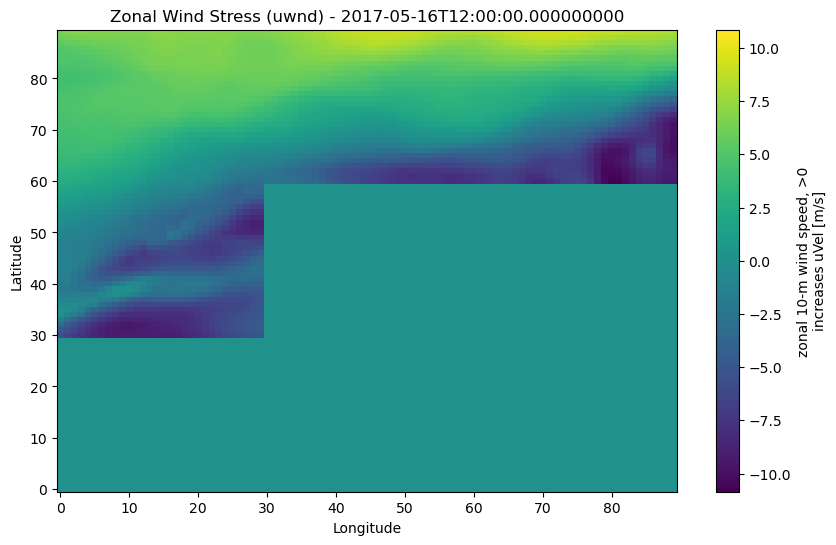

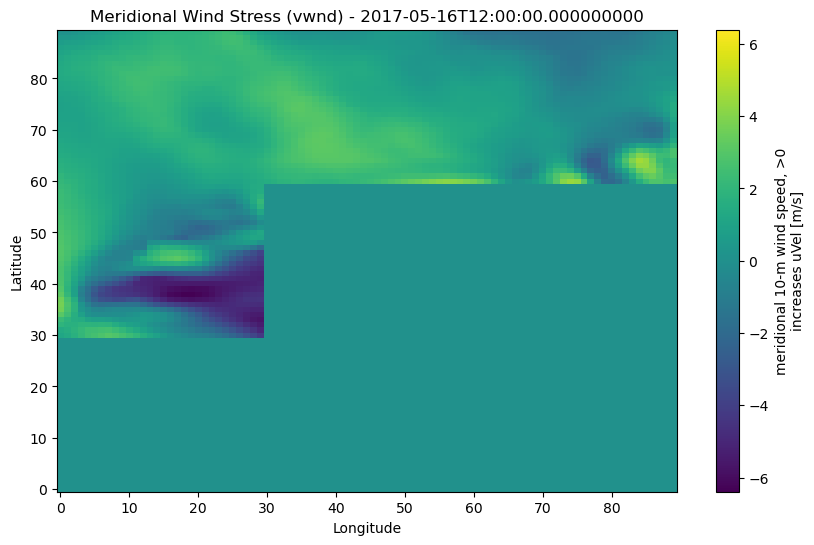

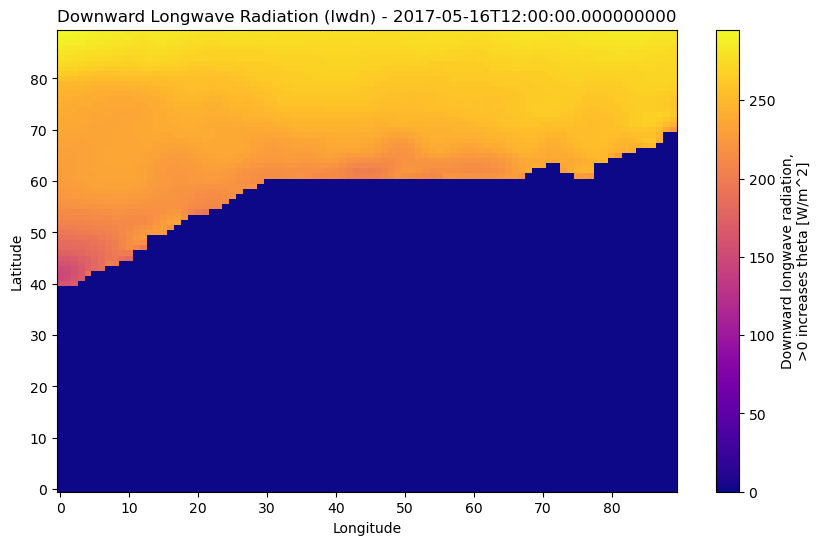

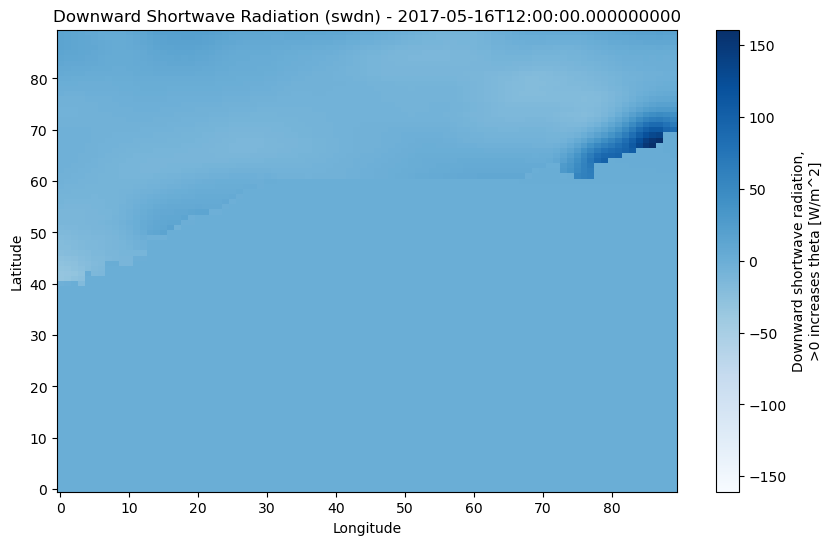

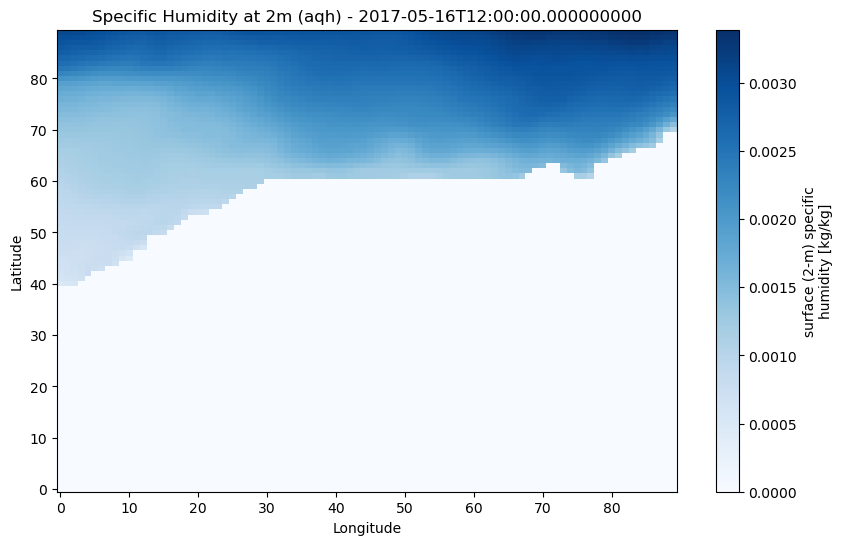

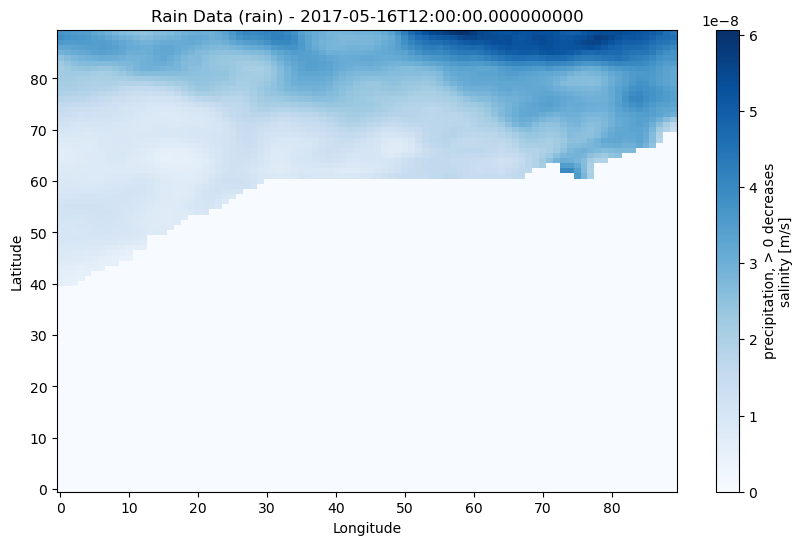

In [33]:
import matplotlib.pyplot as plt

# Extract the corresponding time label for the first time step
time_label = str(uwind_selected.time.isel(time=0).values)

# Plot Zonal Wind Stress
plt.figure(figsize=(10, 6))
uwind_selected.isel(time=0, tile=0).plot.pcolormesh(cmap="viridis")
plt.title(f"Zonal Wind Stress (uwnd) - {time_label}")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Plot Meridional Wind Stress
plt.figure(figsize=(10, 6))
vwind_selected.isel(time=0, tile=0).plot.pcolormesh(cmap="viridis")
plt.title(f"Meridional Wind Stress (vwnd) - {time_label}")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Plot Downward Longwave Radiation
plt.figure(figsize=(10, 6))
lwdn_selected.isel(time=0, tile=0).plot.pcolormesh(cmap="plasma")
plt.title(f"Downward Longwave Radiation (lwdn) - {time_label}")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Plot Downward Shortwave Radiation
plt.figure(figsize=(10, 6))
swdn_selected.isel(time=0, tile=0).plot.pcolormesh(cmap="Blues")
plt.title(f"Downward Shortwave Radiation (swdn) - {time_label}")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Plot Specific Humidity at 2m
plt.figure(figsize=(10, 6))
aqh_selected.isel(time=0, tile=0).plot.pcolormesh(cmap="Blues")
plt.title(f"Specific Humidity at 2m (aqh) - {time_label}")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Plot Rain Data
plt.figure(figsize=(10, 6))
preci_selected.isel(time=0, tile=0).plot.pcolormesh(cmap="Blues")
plt.title(f"Rain Data (rain) - {time_label}")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()



## Implementation of External Forcing Conditions (2017)
The selected 2017 external forcing conditions, including wind stresses, radiation, specific humidity, and rainfall, will be applied to simulate the impact of monsoon effects on ocean stratification. Wind stresses drive surface currents, radiation affects heat fluxes, and rainfall influences salinity by adding freshwater input during the monsoon season.
